In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

# Splitting Data
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler 

# Modeling
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import plot_tree

In [ ]:
cancer = pd.read_csv('/content/datasetbreastcancer.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
cancer.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Menentukan kankernya jinak atau ganas

## **Data Cleaning**

Drop columns

Drop columns disini bertujuan untuk menghapus beberapa kolom yang dianggap tidak berperan penting ketika masuk dalam pemrosesan data

In [ ]:
cancer.drop(columns=['id', 'Unnamed: 32'], inplace = True)

Missing value

missing value utk mencari titik data/informasi yang hilang atau nol pada dataset 

In [ ]:
cancer.isna().sum()/len(cancer.index)*100 

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

## **Final Dataset**

inilah final dataset setelah sebelumnya kita sudah menghapus kolom id dan unnamed:32

In [ ]:
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Pre Processing**

Mendefinisikan data target
*   Apabila kanker bersifat jinak, maka diberi angka 0
*   Apabila kanker bersifat ganas, maka diberi angka 1



In [ ]:
cancer['diagnosis'] = np.where(cancer['diagnosis'] == 'M', 1, 0)
cancer['diagnosis'].value_counts()/cancer.shape[0]*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

Score yang ditunjukkan menunjukkan bahwa data tidak seimbang

In [ ]:
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

In [ ]:
robust = RobustScaler()
X_scaled = robust.fit_transform(X)



Dalam kasus kanker payudara, saya bertujuan ingin mengurangi prediksi terhadap orang yang salah diagnosis, didiagnosis sebagai jinak, tetapi ternyata ganas, yaitu orang yang kita prediksi bukan default (FN). Metrik evaluasi yang digunakan: Recall


*Data Splitting*

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 3030)

Saya menggunakan 0.3 sebagai skor default untuk test_size dan X.shape untuk random_state sehingga data akan dibagi rata

# **Modelling**

KNeighbors Classifier

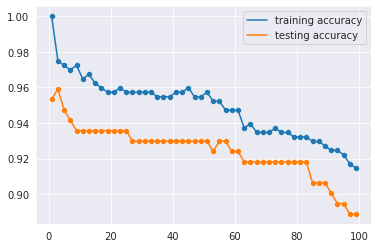

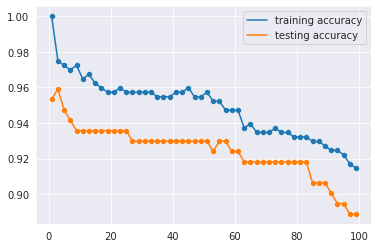

In [ ]:
k = range(1,100,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    y_predict_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)
sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [ ]:
print('This is the best K for KNeighbors Classifier: ', best_k, '\nAccuracy score is: ', score)

This is the best K for KNeighbors Classifier:  3 
Accuracy score is:  0.9590643274853801




Dengan menggunakan model KNN ini, hasil score mengindikasikan underfitting karena akurasi training dan akurasi testing keduanya menurun.


Decision Tree Classifier

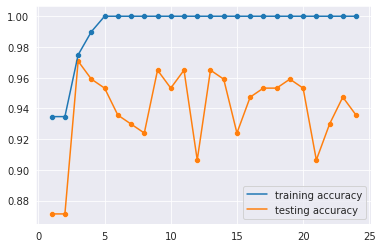

In [ ]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [ ]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  3 
Accuracy score is:  0.9707602339181286




Dengan menggunakan model ini, akurasi score yang dihasilkan mengindikasikan overfitting karena akurasi training menunjukkan hasil baik namun akurasi testing menurun.



*Define Model*

Disini saya menggunakan KNeighbors Classifier dengan mengambil skor K terbaik dan juga Decision Tree Classifier dengan mengambil skor kedalaman terbaik.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)

In [ ]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

knn_cv = model_evaluation(knn, 'recall')
tree_cv = model_evaluation(tree, 'recall')

for model in [knn, tree]:
    model.fit(X_train, y_train)

score_cv = [knn_cv.round(5), tree_cv.round(5)]
score_mean = [knn_cv.mean(), tree_cv.mean()]
score_std = [knn_cv.std(), tree_cv.std()]
score_recall_score = [recall_score(y_test, knn.predict(X_test)), 
                      recall_score(y_test, tree.predict(X_test))]
method_name = [ 'KNN Classifier', 'Decision Tree Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,cv score,mean score,std score,recall score
0,KNN Classifier,"[0.83333, 0.93333, 0.96667, 0.93103, 0.86207]",0.905287,0.049522,0.890625
1,Decision Tree Classifier,"[0.9, 0.93333, 0.73333, 0.93103, 0.86207]",0.871954,0.073970,0.921875


## **HyperParam Tuning**

Hyperparameter tuning disini berperan sangat pentinga agar kita dapat mengontrol perilaku keseluruhan model pembelajaran mesin.

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)
grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9519540229885057
best param {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15, 'random_state': 3030, 'splitter': 'best'}


**Comparison Between Before & After Tuning**

In [ ]:
tree.fit(X_train, y_train)
tree_recall = (recall_score(y_test, tree.predict(X_test)))

grid.best_estimator_.fit(X_train, y_train)
grid_recall = (recall_score(y_test, grid.predict(X_test)))

score_list = [tree_recall, grid_recall]
method_name = ['Decision Tree Classifier Before Tuning', 'Decision Tree Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Decision Tree Classifier Before Tuning,0.921875
1,Decision Tree Classifier After Tuning,0.937500


Berikut ini adalah perbandingan antara score sebelum tuning dan score setelah tuning menggunakan Decision Tree Classifier. Saya memilih untuk melanjutkan ke proses berikutnya dengan menggunakan Decision Tree Classifier setelah ini.

## **Decision Tree Classifier Plot**

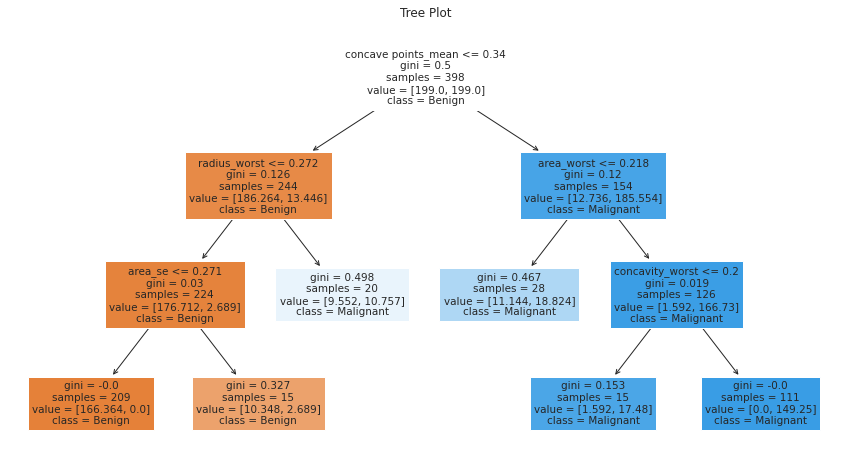

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(grid.best_estimator_, feature_names = list(X), class_names = ['Benign','Malignant'], filled = True)
plt.title('Tree Plot')
plt.show()

## **Feature Importance**

In [ ]:
importance_table = pd.DataFrame({
    'imp': grid.best_estimator_.feature_importances_
}, index = X.columns)
importance_table.sort_values('imp', ascending = False)

,imp
concave points_mean,0.894979
radius_worst,0.057634
area_worst,0.039847
area_se,0.006135
concavity_worst,0.001405
radius_mean,0.000000
concavity_se,0.000000
symmetry_worst,0.000000
concave points_worst,0.000000
compactness_worst,0.000000


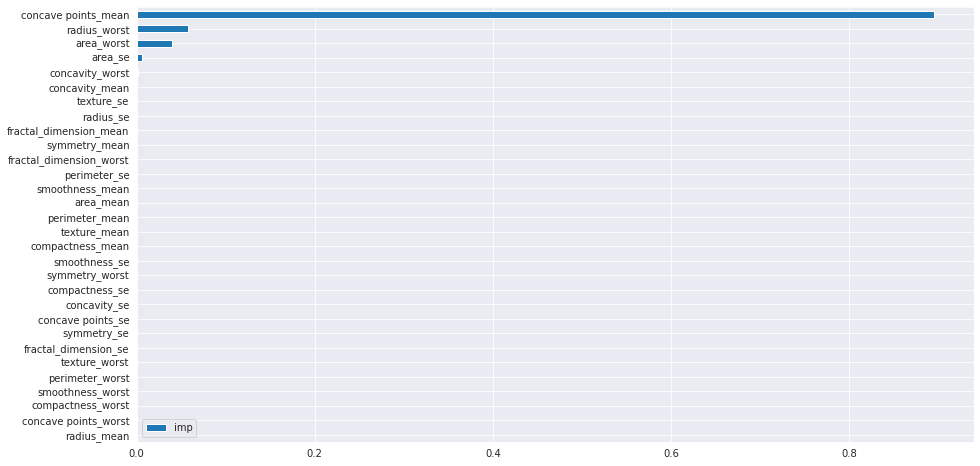

In [ ]:
importance_table.sort_values('imp', ascending = True).plot(kind = 'barh', figsize = (15,8))

Hasil yang ditampilkan pada plot diatas yang menunjukkan bahwa dari ke-30 fitur/variabel yang ada hanya 4 variabel yang penting untuk prediksi.

## **Kesimpulan**

Pada project ini hanya menggunakan Kneighbor Classifier(KNN) dan Decision Tree Classifier dalam memprediksi tumor payudara. Adapun tujuan program ini adalah untuk mengklasifikasikan tumor ganas dan jinak.
Dari proses validasi silang, model KNN memiliki skor tertinggi dengan 0.9 tetapi setelah evaluasi model menggunakan metrik recall, model Tree memiliki skor tertinggi dengan 0.92. Bahkan model Tree menunjukkan overfitting. Meskipun model Tree terindikasi overfitting, saya tetap memilih untuk menggunakan skor ini untuk melanjutkan proses.
Lalu selanjutnya dengan memutuskan untuk mendapatkan parameter terbaik untuk model Tree kita akan melakukan tuning dengan skor terbaik 0.95 yang semakin meningkat, kemudian membandingkan skor model Tree sebelum dan sesudah tuning. Hasil perbandingan membuktikan bahwa model Tree setelah proses Tuning lebih tinggi dari sebelumnya dengan 0.9375.
Kemudian kita cek lagi untuk melihat data dengan menggunakan proses Feature Importance. Yang mengejutkan, dari 30 variable (kolom) yang ada pada dataset, hanya 4 variabel yang penting untuk prediksi.